## Data Quality Assessment for FCFRD Datasets
This script evaluates and removes duplicate rows where needed, calculates the number of unique values per column, calculates the number/percent of nulls per column, and counts number of rows with the same set of null column(s). It also creates histogram for quick data analysis and counts Nulls/NaN values on a date field.

_Author: A. Upadhyaya_

#### Prepare Analysis


#### Set File Read Parameters

In [1]:
#Run from Git Hub project folder structure (script is in "notebooks" folder)
localFolder='../data/01_raw/'
fileName='20210225-ems-raw-v04.xlsx'
sheetNameMed='Medications'
sheetNameProcs='Procedures'
sheetNamePatnt='Patients'

### Import Libraries

In [2]:
# Importing required libraries for the project
import sys # for python library version
import pandas as pd
import numpy as np

In [3]:
print('Python: {}'.format(sys.version))  # Python version
print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version

Python: 3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]
numpy: 1.20.2
pandas: 1.2.4


#### Import From Excel Spreadsheet

##### Reading 'Medications' tab (dataset)

In [4]:
#Import single tab - Medications
dfMed=pd.read_excel(localFolder+fileName,sheet_name=sheetNameMed)

#Print (1) number of rows/columns and (2) column names/types for quick confirmation of successful import
numOriginalRowsMed=len(dfMed)
numColsMed=len(dfMed.columns)
print(sheetNameMed)
print('Number of Rows = '+str(numOriginalRowsMed))
print('Number of Columns = '+str(numColsMed))
dfMed.dtypes

Medications
Number of Rows = 63168
Number of Columns = 6


Dim_Medication_PK                             int64
PatientId                                     int64
Medication_Given_RXCUI_Code                 float64
Medication_Given_Description                 object
FRDPersonnelID                               object
Medication_Administered_Date_Time    datetime64[ns]
dtype: object

#### Reading 'Procedures' tab (dataset)

In [5]:
#Import single tab - Procedures
dfProc=pd.read_excel(localFolder+fileName,sheet_name=sheetNameProcs)

#Print (1) number of rows/columns and (2) column names/types for quick confirmation of successful import
numOriginalRowsProc=len(dfProc)
numColsProc=len(dfProc.columns)
print(sheetNameProcs)
print('Number of Rows = '+str(numOriginalRowsProc))
print('Number of Columns = '+str(numColsProc))
dfProc.dtypes

Procedures
Number of Rows = 170808
Number of Columns = 6


Dim_Procedure_PK                            int64
PatientId                                   int64
Procedure_Performed_Code                    int64
Procedure_Performed_Description            object
FRDPersonnelID                             object
Procedure_Performed_Date_Time      datetime64[ns]
dtype: object

#### Reading 'Patients' tab (dataset)

In [6]:
#Import single tab - Patients
dfPatient=pd.read_excel(localFolder+fileName,sheet_name=sheetNamePatnt)
#Print (1) number of rows/columns and (2) column names/types for quick confirmation of successful import
numOriginalRowsPatient=len(dfPatient)
numColsPatient=len(dfPatient.columns)
print(sheetNamePatnt)
print('Number of Rows = '+str(numOriginalRowsPatient))
print('Number of Columns = '+str(numColsPatient))
dfPatient.dtypes

Patients
Number of Rows = 543774
Number of Columns = 12


PatientId                         int64
FRDPersonnelID                   object
Shift                            object
UnitId                           object
FireStation                       int64
Battalion                         int64
PatientOutcome                   object
PatientGender                    object
CrewMemberRoles                  object
DispatchTime             datetime64[ns]
FRDPersonnelGender               object
FRDPersonnelStartDate    datetime64[ns]
dtype: object

### Creating Histogram 

In [7]:
%matplotlib inline
import matplotlib as mlb
import matplotlib.pyplot as plt

<AxesSubplot:>

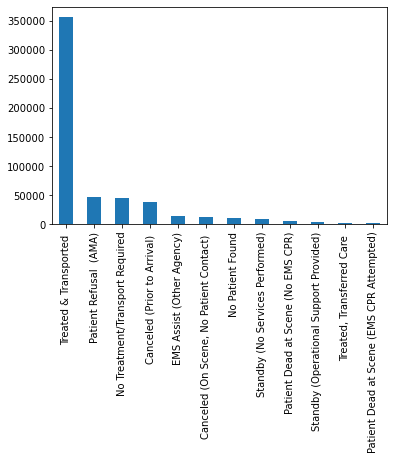

In [8]:
## Histogram for patient outcomes for a quick glace of the 'Patient outcome' frqquency count
dfPatient['PatientOutcome'].value_counts().plot(kind='bar')    

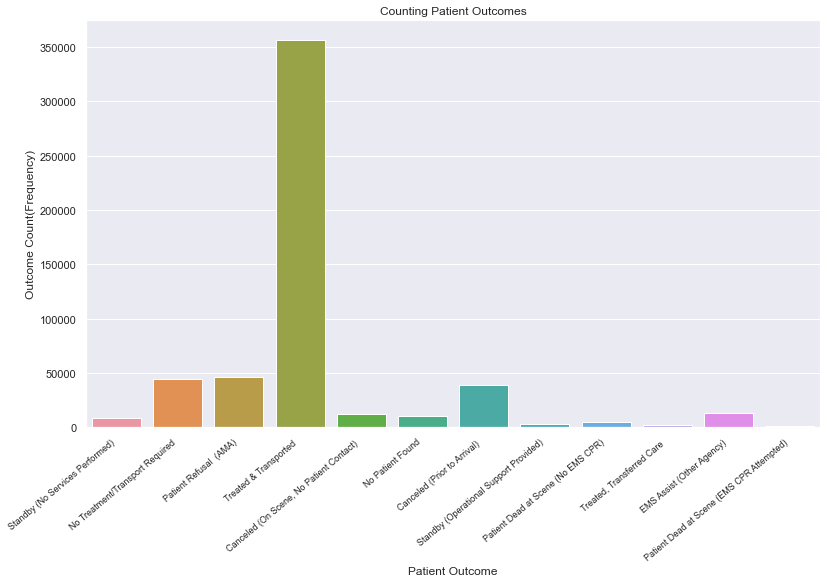

In [9]:
## Another Histogram using Seaborn - for patient outcomes
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=dfPatient['PatientOutcome'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=9)
ax.set_title('Counting Patient Outcomes')
plt.xlabel("Patient Outcome")
plt.ylabel("Outcome Count(Frequency)")
plt.tight_layout()
plt.show()

## Numeric Analysis

### Duplicate Rows
Duplicate rows will likely need to be removed during data conditioning.

In [10]:
## Medications dataframe
#Determine which rows are duplicates (True=duplicate, False=first instance of row)
duplicateRowIdentifierMed=dfMed.duplicated()

#Calculate number of duplicate rows
numDuplicateRowsMed=len(duplicateRowIdentifierMed[duplicateRowIdentifierMed==True])
numUniqueRowsMed=numOriginalRowsMed-numDuplicateRowsMed

#Calculate percentage of rows that are duplicates
percentDuplicateRowsMed=round(numDuplicateRowsMed/len(dfMed)*100,4)

#Print results
print("Number of Duplicate Rows =" )
print(numDuplicateRowsMed)
print('Percentage of Rows that are Duplicates = ')
print(percentDuplicateRowsMed)

Number of Duplicate Rows =
258
Percentage of Rows that are Duplicates = 
0.4084


In [11]:
#Medication Dataset - with duplicates (the rows that are flagged as duplicates ( but not removed) )
dfMedDuplicates=dfMed.loc[duplicateRowIdentifierMed==True,:]

#Confirm
print('Expected Number of duplicate Rows = '+str(numDuplicateRowsMed))
print('Updated Data Frame Shape =')
print(dfMedDuplicates.shape)

Expected Number of duplicate Rows = 258
Updated Data Frame Shape =
(258, 6)


Duplicate rows will be removed before conducting the remaining analysis in this script.

In [12]:
#Medication Dataset - Reduce to the rows that were not flagged as duplicates
dfMed=dfMed.loc[duplicateRowIdentifierMed==False,:]

#Confirm
print('Expected Number of Rows = '+str(numUniqueRowsMed))
print('Updated Data Frame Shape =')
print(dfMed.shape)

Expected Number of Rows = 62910
Updated Data Frame Shape =
(62910, 6)


##### Now checking for Procedure dataset

In [13]:
##Procedure dataframe
#Determine which rows are duplicates (True=duplicate, False=first instance of row)
duplicateRowIdentifierProc=dfProc.duplicated()

#Calculate number of duplicate rows
numDuplicateRowsProc=len(duplicateRowIdentifierProc[duplicateRowIdentifierProc==True])
numUniqueRowProc=numOriginalRowsProc-numDuplicateRowsProc

#Calculate percentage of rows that are duplicates
percentDuplicateRowProc=round(numDuplicateRowsProc/len(dfProc)*100,4)

#Print results
print("Number of Duplicate Rows =" )
print(numDuplicateRowsProc)
print('Percentage of Rows that are Duplicates = ')
print(percentDuplicateRowProc)

Number of Duplicate Rows =
647
Percentage of Rows that are Duplicates = 
0.3788


In [14]:
#Procedure Dataset - with duplicates (the rows that are flagged as duplicates ( but not removed) )
dfProcDuplicates=dfProc.loc[duplicateRowIdentifierProc==True,:]

#Confirm
print('Expected Number of duplicate Rows = '+str(numDuplicateRowsProc))
print('Updated Data Frame Shape =')
print(dfProcDuplicates.shape)

Expected Number of duplicate Rows = 647
Updated Data Frame Shape =
(647, 6)


### Unique Values Per Column
This is a simple calculation of the number of unique values per individual column.

In [15]:
# Medication dataset -- Calculate the number of unique values per columns (NULL counts as a value)
dsNumUniqueMed=dfMed.nunique(dropna=False)
dsNumUniqueMed.name='Number of Unique Values'
print(dsNumUniqueMed)

Dim_Medication_PK                    62910
PatientId                            38405
Medication_Given_RXCUI_Code             33
Medication_Given_Description            33
FRDPersonnelID                         845
Medication_Administered_Date_Time    60069
Name: Number of Unique Values, dtype: int64


### Null Values Per Column
This is a simple calculation of the number/percentage of null values per individual column.

In [16]:
#Medication dataset - Calculate the number of null values per columns
dsNumNullMed=dfMed.isnull().sum()
dsNumNullMed.name='Number Rows With Nulls'
print(dsNumNullMed)

Dim_Medication_PK                    0
PatientId                            0
Medication_Given_RXCUI_Code          6
Medication_Given_Description         6
FRDPersonnelID                       0
Medication_Administered_Date_Time    1
Name: Number Rows With Nulls, dtype: int64


In [17]:
#Calculate the percentage of null values per columns
dsPercentNullMed=(dsNumNullMed/numUniqueRowsMed*100).round(2)
dsPercentNullMed.name='Percent Rows With Nulls in Medications dataset'
print(dsPercentNullMed)

Dim_Medication_PK                    0.00
PatientId                            0.00
Medication_Given_RXCUI_Code          0.01
Medication_Given_Description         0.01
FRDPersonnelID                       0.00
Medication_Administered_Date_Time    0.00
Name: Percent Rows With Nulls in Medications dataset, dtype: float64


In [18]:
#Merge data series (by column) together
dfPerColMed=pd.DataFrame()
dfPerColMed[dsNumUniqueMed.name]=dsNumUniqueMed
dfPerColMed[dsNumNullMed.name]=dsNumNullMed
dfPerColMed[dsPercentNullMed.name]=dsPercentNullMed

### Null Values Per Row
This section determines which columns have a null value per each row, resulting in a data series matching the number of unique rows in the dataset. The series values are tuples of column names. The resulting table shows the unique tuples of column names with their corresponding row count. Once the data subsets for the project questions are determined, this will help inform the completeness of those data subsets.

In [19]:
#Medication dataset -- For a single row, determine which columns have null values
def NullsPerRow(dsRow):  
    columnsNull=list(dsRow[dsRow.isnull()].index)
    columnsNull.sort()
    columnsNull=tuple(columnsNull) #used tuple since lists can't be used by pandas unique()
    return(columnsNull)
dsNulls=dfMed.apply(NullsPerRow,axis=1)

#Create data frame for counting 
dfNulls=pd.DataFrame(dsNulls.unique(),columns=['Columns With Null'])
dfNulls['Number of Rows']=0

#Count the number of rows per each tuple of null columns
for index in dfNulls.index:
    dfNulls.loc[index,'Number of Rows']=len(dsNulls[dsNulls==dfNulls.loc[index,'Columns With Null']])
dfNulls.sort_values(by='Number of Rows',ascending=False,inplace=True)
dfNulls.reset_index(drop=True,inplace=True)

#Add a column for percent of rows
dfNulls['Percent of Rows']=(dfNulls['Number of Rows']/numUniqueRowsMed*100).round(2)
dfNulls

,Columns With Null,Number of Rows,Percent of Rows
0,(),62904,99.99
1,"(Medication_Given_Description, Medication_Give...",5,0.01
2,"(Medication_Administered_Date_Time, Medication...",1,0.00


## Visualizations

In [20]:
### For Medications Dataset Visualization
print(sheetNameMed+' Dataset\n')
print('Original Number of Rows = '+str(numOriginalRowsMed))
print('Duplicate Number of Rows = '+str(numDuplicateRowsMed))
print('Percent Duplicate Rows = '+str(percentDuplicateRowsMed)+'\n')
print('Duplicate rows removed prior to remaining analysis')
print('Unique Number of Rows = '+str(numUniqueRowsMed)+'\n')

Medications Dataset

Original Number of Rows = 63168
Duplicate Number of Rows = 258
Percent Duplicate Rows = 0.4084

Duplicate rows removed prior to remaining analysis
Unique Number of Rows = 62910



In [21]:
dfPerColMed

,Number of Unique Values,Number Rows With Nulls,Percent Rows With Nulls in Medications dataset
Dim_Medication_PK,62910,0,0.00
PatientId,38405,0,0.00
Medication_Given_RXCUI_Code,33,6,0.01
Medication_Given_Description,33,6,0.01
FRDPersonnelID,845,0,0.00
Medication_Administered_Date_Time,60069,1,0.00


In [22]:
dfNulls

,Columns With Null,Number of Rows,Percent of Rows
0,(),62904,99.99
1,"(Medication_Given_Description, Medication_Give...",5,0.01
2,"(Medication_Administered_Date_Time, Medication...",1,0.00


In [23]:
## Needs to install 1st time only to setup your environment
##!pip install -U pandasql

In [24]:
## You will need to 'pip' install 'pandasql' to import 'sqldf'
from pandasql import sqldf

In [25]:
## For Medication Dataset counting total "duplicate" row for verication to check above count, from cross checking as above's duplicate number.
outputDupMed = sqldf("select count(*) from dfMedDuplicates")
outputDupMed 

,count(*)
0,258


In [26]:
## For Procedure Dataset counting total "duplicate" row for verication to check above count, from cross checking as above's duplicate number.
outputDupProc = sqldf("select count(*) from dfProcDuplicates")
outputDupProc


,count(*)
0,647


In [27]:
## Checking FRDPersonnelID ='9E5D40DC-5DC6-E411-80C7-001DD8B71D38' for duplication validation that appears in appear in two agencies
outputMed = sqldf("select * from dfMed where FRDPersonnelID='9E5D40DC-5DC6-E411-80C7-001DD8B71D38'")
outputMed

,Dim_Medication_PK,PatientId,Medication_Given_RXCUI_Code,Medication_Given_Description,FRDPersonnelID,Medication_Administered_Date_Time
0,84682,537112,26225.0,Ondansetron (Zofran),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-03-05 11:25:00.000000
1,119059,552215,4337.0,Fentanyl Citrate (Sublimaze),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-03-23 09:49:11.000000
2,127985,577130,6960.0,Midazolam (Versed),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-04-21 21:27:35.000000
3,130603,584303,1191.0,"Acetylsalicylic Acid (Aspirin, ASA)",9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-04-30 09:45:31.000000
4,135831,599345,4917.0,Nitroglycerin,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-05-16 11:53:37.000000
...,...,...,...,...,...,...
253,435002,1361141,1191.0,"Acetylsalicylic Acid (Aspirin, ASA)",9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2020-10-01 07:05:00.000000
254,437552,1398211,7242.0,Naloxone (Narcan),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2020-11-14 23:25:00.000000
255,442175,1461295,1191.0,"Acetylsalicylic Acid (Aspirin, ASA)",9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 08:44:42.000000
256,442176,1461295,26225.0,Ondansetron (Zofran),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 08:39:24.000000


##### Query to verify duplicate exists in TABLE - Procedures

In [28]:
## Similarly from Procedure dataset, Checking FRDPersonnelID ='9E5D40DC-5DC6-E411-80C7-001DD8B71D38' for duplication validation that appears in appear in two agencies
outputProcedure = sqldf("select * from dfProc where FRDPersonnelID='9E5D40DC-5DC6-E411-80C7-001DD8B71D38'")
outputProcedure


,Dim_Procedure_PK,PatientId,Procedure_Performed_Code,Procedure_Performed_Description,FRDPersonnelID,Procedure_Performed_Date_Time
0,188008,489676,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-01-10 18:04:36.000000
1,188008,489676,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-01-10 18:04:36.000000
2,195515,499052,392230005,IV Start - Extremity Vein (arm or leg),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-01-21 12:07:25.000000
3,195515,499052,392230005,IV Start - Extremity Vein (arm or leg),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-01-21 12:07:25.000000
4,196233,501265,392230005,IV Start - Extremity Vein (arm or leg),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-01-23 20:02:00.000000
...,...,...,...,...,...,...
1289,1260237,1461899,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 21:57:05.000000
1290,1260238,1461909,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 11:57:07.000000
1291,1260238,1461909,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 11:57:07.000000
1292,1260239,1461909,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 12:09:34.000000


In [29]:
## From Procedure dataset, counting duplicates where BY Procedure_Performed_Date_Time,Procedure_Performed_Code, Procedure_Performed_Description, FRDPersonnelID, PatientId are same
output = sqldf("SELECT PatientId, Procedure_Performed_Code,Procedure_Performed_Description, FRDPersonnelID,Procedure_Performed_Date_Time, COUNT(*) FROM dfProc GROUP BY PatientId, Procedure_Performed_Code, Procedure_Performed_Description, FRDPersonnelID, Procedure_Performed_Date_Time HAVING COUNT(*) > 1")
##output['Procedure_Performed_Description']  
output

,PatientId,Procedure_Performed_Code,Procedure_Performed_Description,FRDPersonnelID,Procedure_Performed_Date_Time,COUNT(*)
0,482102,268400002,CV - ECG - 12 Lead Obtained,097E57D9-F792-E211-A596-78E7D18C3D20,2018-01-03 12:31:00.000000,2
1,489676,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-01-10 18:04:36.000000,2
2,493018,182705007,Decompression - Chest Decompression,76D4C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-14 04:54:00.000000,2
3,499052,392230005,IV Start - Extremity Vein (arm or leg),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-01-21 12:07:25.000000,2
4,501265,392230005,IV Start - Extremity Vein (arm or leg),9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-01-23 20:02:00.000000,2
...,...,...,...,...,...,...
738,1461899,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 21:42:53.000000,2
739,1461899,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 21:44:06.000000,2
740,1461899,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 21:57:05.000000,2
741,1461909,268400002,CV - ECG - 12 Lead Obtained,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2021-01-30 11:57:07.000000,2


##### List All Rows Containing Duplicates from TABLE - Procedures

In [30]:
##List All Rows Containing "more than 2" duplicates from  'Procedures' datasets, where  Procedure_Performed_Code,Procedure_Performed_Description,PatientId, FRDPersonnelID, Procedure_Performed_Date_Time matches.
## This query also shows in some cases, same procedure was performed on the same patient by different FRDPersonnel at the same date/time
output2 = sqldf("SELECT a.*FROM dfProc a JOIN (SELECT Procedure_Performed_Date_Time, Procedure_Performed_Description, FRDPersonnelID,PatientId,Procedure_Performed_Code  FROM dfProc GROUP BY Procedure_Performed_Code,Procedure_Performed_Description,PatientId, FRDPersonnelID, Procedure_Performed_Date_Time HAVING count(*) > 2 ) b ON a.Procedure_Performed_Description = b.Procedure_Performed_Description AND a.FRDPersonnelID = b.FRDPersonnelID ORDER BY a.FRDPersonnelID")
output2

,Dim_Procedure_PK,PatientId,Procedure_Performed_Code,Procedure_Performed_Description,FRDPersonnelID,Procedure_Performed_Date_Time
0,950808,616588,46825001,Electrocardiographic monitoring,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-06-03 20:12:45.000000
1,950808,616588,46825001,Electrocardiographic monitoring,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-06-03 20:12:45.000000
2,950914,616724,46825001,Electrocardiographic monitoring,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-06-04 02:26:33.000000
3,950914,616724,46825001,Electrocardiographic monitoring,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-06-04 02:26:33.000000
4,950915,616724,46825001,Electrocardiographic monitoring,9E5D40DC-5DC6-E411-80C7-001DD8B71D38,2018-06-04 02:27:55.000000
...,...,...,...,...,...,...
254,784130,610570,46825001,Electrocardiographic monitoring,F8FB050E-2051-E311-B3F8-AE437D699481,2018-05-28 19:10:38.000000
255,784131,610570,46825001,Electrocardiographic monitoring,F8FB050E-2051-E311-B3F8-AE437D699481,2018-05-28 19:10:38.000000
256,784132,610570,46825001,Electrocardiographic monitoring,F8FB050E-2051-E311-B3F8-AE437D699481,2018-05-28 19:10:38.000000
257,967641,629497,46825001,Electrocardiographic monitoring,F8FB050E-2051-E311-B3F8-AE437D699481,2018-06-12 08:25:19.000000


#### Query to verify duplicate exists for FirePersonnel in TABLE - Patients
###### Goal here is to find ( quick check), if there is same FRDPersonnelID and FRDPersonnelGender with multiple FRDPersonnelStartDate. 
###### Manual validation may be required ( using the excel dataset) to verify this as same FirePersonnel may have multiple start date.

In [31]:
outputP1 = sqldf("SELECT FRDPersonnelID, FRDPersonnelGender,FRDPersonnelStartDate, COUNT(*) as Total FROM dfPatient GROUP BY FRDPersonnelID,FRDPersonnelGender HAVING COUNT(*) > 1 ORDER BY Total desc")
outputP1 

,FRDPersonnelID,FRDPersonnelGender,FRDPersonnelStartDate,Total
0,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,Male,2017-04-17 00:00:00.000000,2763
1,2AD4C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,2002-10-21 00:00:00.000000,2602
2,54D7C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,1991-06-03 00:00:00.000000,2544
3,D6D4C99E-9E01-E211-B5F5-78E7D18CFD3C,Female,2002-07-13 00:00:00.000000,2140
4,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,1997-08-18 00:00:00.000000,2133
...,...,...,...,...
1780,DDD8C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,2006-12-26 00:00:00.000000,2
1781,E3D4C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,1987-09-21 00:00:00.000000,2
1782,E3D8C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,1997-12-08 00:00:00.000000,2
1783,F3F2340E-F875-E511-80CD-001DD8B71D38,Male,2014-09-15 00:00:00.000000,2


### Checking 'date' formats for confirmity

In [32]:
##Ignoring an invalid 'DispatchTime' value 
##dfPatient['DispatchTime'] = pd.to_datetime(dfPatient['DispatchTime'], errors='ignore')

##Changing an invalid 'DispatchTime' value to NaN ( Note this method does not throw error but changes empty values to NaN)
dfPatient['DispatchTime'] = pd.to_datetime(dfPatient['DispatchTime'], errors='coerce')
dfPatient


,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,CrewMemberRoles,DispatchTime,FRDPersonnelGender,FRDPersonnelStartDate
0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,"Primary Patient Caregiver-At Scene,Primary Pat...",2018-01-01 00:29:02,Male,1997-08-18
1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,A - Shift,M404,4,401,Standby (No Services Performed),NaN,"Driver-Transport,Other Patient Caregiver-At Scene",2018-01-01 00:29:02,Male,2007-02-19
2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,"Intern/Student,Other Patient Caregiver-At Scen...",2018-01-01 00:29:02,Male,2008-08-18
3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,"Primary Patient Caregiver-At Scene,Primary Pat...",2018-01-01 00:40:54,Male,2011-10-24
4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,"Driver-Response,Driver-Transport",2018-01-01 00:40:54,Male,2012-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...
543769,1482100,AE64E755-C419-E511-80CA-001DD8B71D38,C - Shift,E418,18,404,EMS Assist (Other Agency),NaN,Other Patient Caregiver-At Scene,2021-01-28 19:16:51,Male,2015-01-12
543770,1482100,81D4C99E-9E01-E211-B5F5-78E7D18CFD3C,C - Shift,E418,18,404,EMS Assist (Other Agency),NaN,Other Patient Caregiver-At Scene,2021-01-28 19:16:51,Male,1999-03-15
543771,1482100,CBD4C99E-9E01-E211-B5F5-78E7D18CFD3C,C - Shift,E418,18,404,EMS Assist (Other Agency),NaN,"Driver-Response,Primary Patient Caregiver-At S...",2021-01-28 19:16:51,Male,2006-12-11
543772,1482561,9CD3C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M429,29,402,No Patient Found,NaN,"Driver-Response,Driver-Transport",2020-12-04 19:54:39,Male,2006-12-11


#### Finding the count of non-NaN value across the row axis
Syntax: DataFrame.count(axis=0, level=None, numeric_only=False)
<BR>Parameters:
<BR>axis : 0 or ‘index’ for row-wise, 1 or ‘columns’ for column-wise
<BR>level : If the axis is a MultiIndex (hierarchical), count along a particular level, collapsing into a DataFrame
<BR>numeric_only : Include only float, int, boolean data

In [33]:
##find the number of non-NaN/null value across the row axis in 'dfPatient' dataframe
dfPatient.count(axis = 0) 

PatientId                543774
FRDPersonnelID           543774
Shift                    543774
UnitId                   543774
FireStation              543774
Battalion                543774
PatientOutcome           543772
PatientGender            412396
CrewMemberRoles          543774
DispatchTime             543774
FRDPersonnelGender       543300
FRDPersonnelStartDate    543300
dtype: int64

In [34]:
# Count total NaN at each column in the DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", dfPatient.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 PatientId                     0
FRDPersonnelID                0
Shift                         0
UnitId                        0
FireStation                   0
Battalion                     0
PatientOutcome                2
PatientGender            131378
CrewMemberRoles               0
DispatchTime                  0
FRDPersonnelGender          474
FRDPersonnelStartDate       474
dtype: int64


So, we can see datetime column 'DispatchTime' has '0' NaN values. This is just to show formatting check of a datetime column ( i.e: Dispatch Time) as an example.Sane process can be applied to other datetime columns.
Also, note other columns NaN count matches with above information above.